<a href="https://colab.research.google.com/github/PriyankaDhar2/Minor-Projects/blob/main/Tips_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Priliminary Work

**First things first, we need to import the necessary modules**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Now we load the tips dataset into a pandas dataframe**

In [ ]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Always properly clean and study the dataset before moving on to the actual job**

In [ ]:
df.isnull().sum(axis = 0)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


**Encoding the categorical values into numerical values**

In [ ]:
df['smoker'] = np.where(df['smoker']=='Yes', 1, 0)
df['sex'] = np.where(df['sex']=='Female', 1, 0)
df['time'] = np.where(df['time']=='Dinner', 1, 0)

**One hot encoding the 'day' values and concatinating with original dataframe**

In [ ]:
days = pd.get_dummies(pd.DataFrame(df['day']), drop_first=True)
df.drop(['day'],axis = 1,inplace = True)
df = pd.concat([df, days], axis=1, join='inner')
df.head()

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun
0,16.99,1.01,1,0,1,2,0,0,1
1,10.34,1.66,0,0,1,3,0,0,1
2,21.01,3.50,0,0,1,3,0,0,1
3,23.68,3.31,0,0,1,2,0,0,1
4,24.59,3.61,1,0,1,4,0,0,1


In [ ]:
df['time'].unique()

array([1, 0])

**Tips is a relatively simple dataset, we can consider all the amounts to be in $. Now , considering that "tip" is to be our predicted value(y) we find its correllation with the other numeric values in the dataset.**

In [ ]:
df.corr()['tip']

total_bill    0.675734
tip           1.000000
sex          -0.088862
smoker        0.005929
time          0.121629
size          0.489299
day_Fri      -0.055463
day_Sat      -0.002790
day_Sun       0.125114
Name: tip, dtype: float64

**It is observed that tip is positively and strongly correlated with both "total_bill" as well as "size"**

**Before we move on, we check the correlation of the other numeric variables on each other. A heatmap will be appropriate for this purpose.**

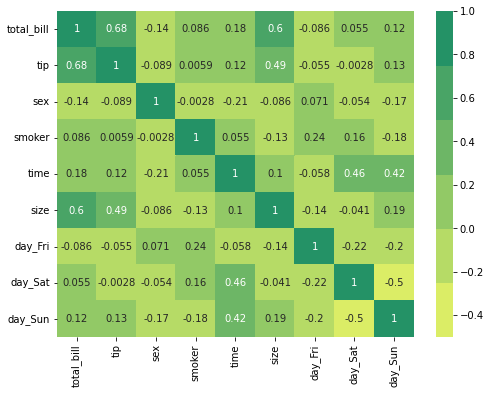

In [ ]:
plt.figure(1,(8,6))
sns.heatmap(df.corr(),annot=True,cmap = sns.color_palette("summer_r"))
plt.show()

**As seen from the heatmap, there is a direct relationsip between total_bill and size of the meal, therefore we choose one of the parameters only to avoid [Multicollinearity](https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea#:~:text=When%20independent%20variables%20are%20highly,in%20the%20data%20or%20model.)**

**Here we choose total_bill since it's R value is higher compared to size, for tip**

**Now we create a histplot to view the general distribution of total_bills, tips and then we create boxplots of the tip as well as the total_bill to find [outliers](https://www.tutorialspoint.com/mean_median_and_mode/finding_outliers_in_data_set.htm).** 

**(This step can be optional if the given dataset is already known to be a good one)**

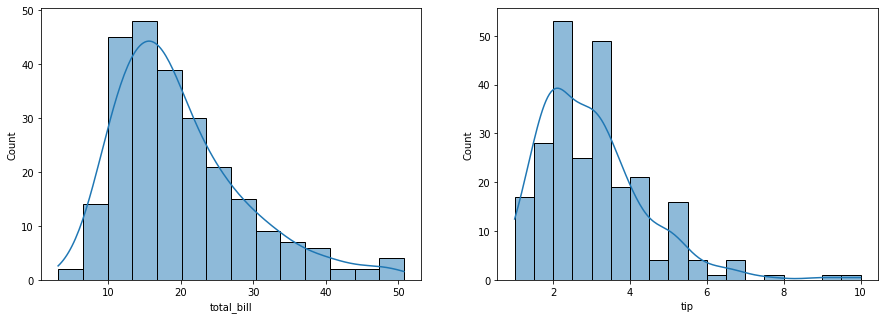

In [ ]:
plt.figure(0,(15,5))
plt.subplot(121)
sns.histplot(df['total_bill'], kde = True)
plt.subplot(122)
sns.histplot(df['tip'], kde = True)
plt.show()

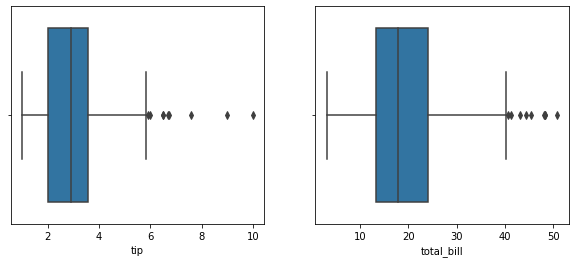

In [ ]:
plt.figure(1,(10,4))
plt.subplot(121)
sns.boxplot(x = df['tip'])
plt.subplot(122)
sns.boxplot(x = df['total_bill'])
plt.show()

**It can be observed that there are very few extreme outliers in the dataset and the dataset can be used as it is without further modification**

## Training Portion

Now we can consider tip as dependent variable(y) and total_bill as the independent variable(x)

**So the next step is to decide which model may be appropriate for the problem by plotting the independent variable w.r.t the dependent variable**

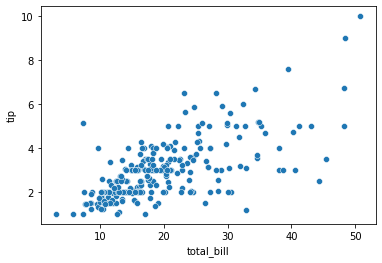

In [ ]:
sns.scatterplot(data = df, x = 'total_bill', y = 'tip')
plt.show()

**For our second model which needs to be more accurate we do the following instead**

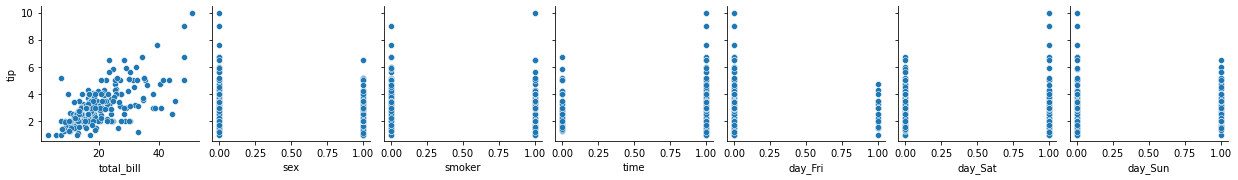

In [ ]:
sns.pairplot(data=df,
              y_vars=['tip'],
              x_vars=df.drop(['tip','size'], axis=1).columns
            )
plt.show()

**Based on the plot it can be inferred that a simple linear regression model will be sufficient for our usecase.. now we split the data into training and testing segments and train the model using the training data**

In [ ]:
X = np.array(df['total_bill']).reshape(-1,1)
y = np.array(df['tip']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
model_1 = LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

**Based on the pairplot it can be inferred that a multiple linear regression model will be sufficient for our usecase.. now we split the data into training and testing segments and train the model using the training data**

In [ ]:
X1 = df.drop(['tip','size'], axis=1).values
y1 = np.array(df['tip']).reshape(-1,1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,test_size = 0.25)
model_2 = LinearRegression()
model_2.fit(X1_train,y1_train)

LinearRegression()

**Before making our model predict, we check it's $R^2$ Score on train and test data for getting an overall idea about the performance of our regressor**

In [ ]:
print("Model 1 Train R^2:",round(model_1.score(X_train,y_train),3))
print("Model 1 Test R^2:",round(model_1.score(X_test,y_test),3))

Model 1 Train R^2: 0.542
Model 1 Test R^2: -0.206


In [ ]:
print("Model 2 Train R^2:",round(model_2.score(X1_train,y1_train),3))
print("Model 2 Test R^2:",round(model_2.score(X1_test,y1_test),3))

Model 2 Train R^2: 0.447
Model 2 Test R^2: 0.481


## Prediction and testing portion

**Now we make our model predict test values of y_test and compare it with the actual values.**

In [ ]:
predictions_1 =  model_1.predict(X_test)
comparison_df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions_1.flatten()})
comparison_df1.head()

,Actual,Predicted
0,5.17,4.857971
1,2.00,1.608302
2,2.72,2.294634
3,1.01,2.735933
4,2.00,1.915189


In [ ]:
predictions_2 =  model_2.predict(X1_test)
comparison_df2 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': predictions_2.flatten()})
comparison_df2.head()

,Actual,Predicted
0,2.00,2.684493
1,4.50,4.345575
2,2.02,2.546081
3,1.92,1.926799
4,4.00,2.635260


**Calculating Error Metrics**

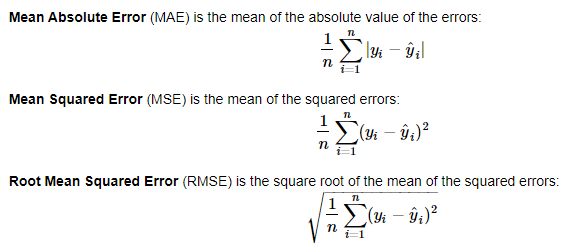

All of these can be easily calculated using the "metrics" class of the sklearn module

In [ ]:
import sklearn.metrics as metrics
print(metrics.mean_absolute_error(comparison_df1['Actual'],comparison_df1['Predicted']))
print(metrics.mean_squared_error(comparison_df1['Actual'],comparison_df1['Predicted']))
print(np.sqrt(metrics.mean_squared_error(comparison_df1['Actual'],comparison_df1['Predicted'])))

0.8131735910252724
1.2238348063188067
1.1062706749791422


In [ ]:
print(metrics.mean_absolute_error(comparison_df2['Actual'],comparison_df2['Predicted']))
print(metrics.mean_squared_error(comparison_df2['Actual'],comparison_df2['Predicted']))
print(np.sqrt(metrics.mean_squared_error(comparison_df2['Actual'],comparison_df2['Predicted'])))

0.7540252354950715
1.2272426906406642
1.1078098621336896


**Now we visualize our model's predictions**

> 1) Plot Actual vs. Predicted tip values

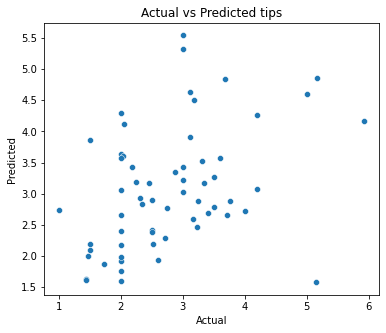

In [ ]:
plt.figure(1,(6,5))
plt.title('Actual vs Predicted tips')
sns.scatterplot(data = comparison_df1, x = 'Actual',y = 'Predicted')
plt.show()

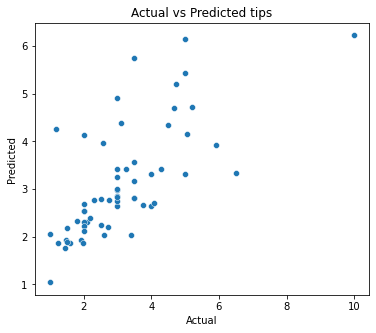

In [ ]:
plt.figure(1,(6,5))
plt.title('Actual vs Predicted tips')
sns.scatterplot(data = comparison_df2, x = 'Actual',y = 'Predicted')
plt.show()

From the Scatterplot it can be seen that the points are not very much clustered together in a straight line, which helps us understand that the model is not much accurate and there is a big enough disparity between the actual value and predicted value

> 2) Plot total_bill vs. Actual tip values with regression line

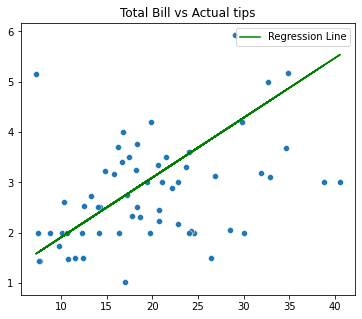

In [ ]:
plt.figure(1,(6,5))
plt.title('Total Bill vs Actual tips')
sns.scatterplot(x = X_test.flatten(),y = y_test.flatten())
plt.plot(X_test.flatten(), predictions_1.flatten(), color = 'green', label = 'Regression Line')
plt.legend()
plt.show()